## Basic imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Project graph

In [2]:
G = nx.DiGraph()
G.add_node('MyBizLogic')
G.add_node('TestsForNUnit2')
G.add_node('TestsForNUnit3')
G.add_edge('TestsForNUnit2', 'MyBizLogic')
G.add_edge('TestsForNUnit3', 'MyBizLogic')

In [3]:
print(f'Nodes: {G.number_of_nodes()}')
print(f'Edged: {G.number_of_edges()}')

Nodes: 3
Edged: 2


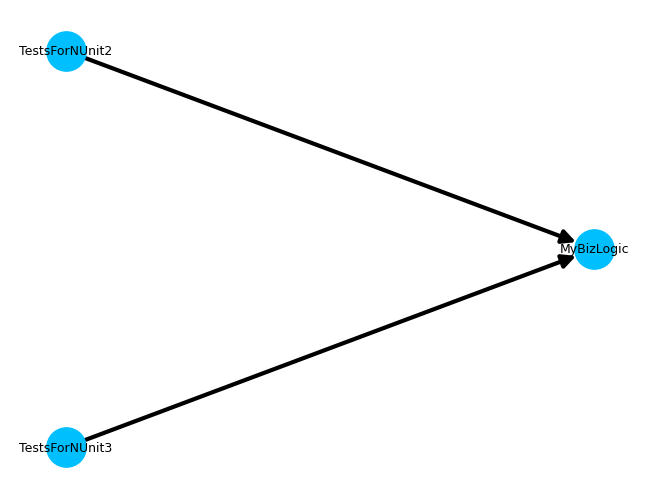

In [4]:
options = {
    'node_color': 'deepskyblue',
    'node_size': 800,
    'width': 3,
    'with_labels': True,
    'font_size': 9,
    'arrowsize': 20,
}

nx.draw_circular(G, **options)

In [5]:
G_original = G.copy()

## Algorithm

In [6]:
def find_node_order(G, round = 1):
    print(f"Round #{round}\n===============")
    
    no_dependencies = []
    for x in (node for node, out_degree in G.out_degree() if out_degree == 0):
        no_dependencies.append(x)
    
    for node in sorted(no_dependencies):
        print(node)
        
    for x in no_dependencies:
        G.remove_node(x)
    
    if G.number_of_nodes() > 0:
        print("")
        find_node_order(G, round + 1)

## Find project migration sequence

In [7]:
find_node_order(G)

Round #1
MyBizLogic

Round #2
TestsForNUnit2
TestsForNUnit3


## Intermediate step
After removing MyBizLogic the graph looks like this:

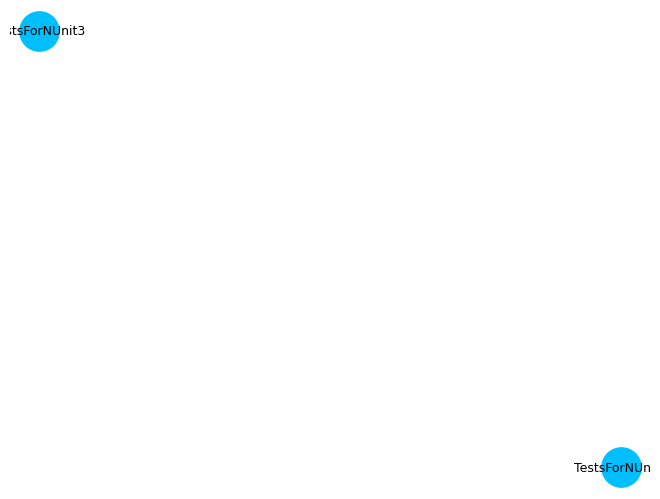

In [8]:
intermediate_step = G_original.copy()
intermediate_step.remove_node('MyBizLogic')
nx.draw(intermediate_step, **options)